Projeto 1: Ciência dos Dados



 Nome: Matheus Freitas

IEA - International Energy Agency

A Agência Nacional de Energia tem como foco principal obter máxima eficiência ao produzir energia. Mesmo que sua missão
atualmente é mais complexa, abrangendo um escopo maior de problemas a serem resolvidos. Neste Projeto 1, analisaremos se
a agência atingiu suas metas estabelecidas logo no início de sua fundação, em 1974. Tais metas tratavam basicamente sobre
a tentativa de estabilizar/aumentar a produção de energia, principalmente a que utilizava o óleo como principal matéria-prima.

Assim, a pergunta principal é: Os países membros tiveram uma otimização ou melhora na produção de energia total por ano ao
ingressar na IEA?

In [300]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import math as math

In [301]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\matfs\Desktop\Ciência dos Dados\P1-Ciencia-dos-dados\Projeto 1


Primeiro, vamos ler os documentos baixados (OBS: alguns ainda serão utilizados, este é apenas um protótipo sujo) e listar os países da nossa análise exploratória (amostra), cuja escolha teve como critério principal ser um país-membro da IEA e ter uma natureza socioeconômica que difere da do restante do grupo.

In [302]:
energy_produce = pd.read_excel("energy produce total.xlsx")
energy_produce_idx = energy_produce.set_index('Energy production, total (toe)')

oil_production = pd.read_excel("Oil Production.xls.xlsx")
oil_production_idx = oil_production.set_index("Crude oil production, total (toe)")

lista_membros = ['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']
lista_membros1 = ['Australia', 'Canada', 'Denmark', 'Italy', 'Mexico', 'Norway', 'United States']

lista_ano = ["1975", "1976", "1977", "1978", "1979", "1980"]

Construindo um DataFrame com os dados a serem analisados.

In [303]:
enerprod = energy_produce_idx.loc[:, lista_ano]
enerprod_1975_todos = enerprod.loc[:, ['1975']]
oilprod = oil_production_idx.loc[:, [1975, 1976, 1977, 1978, 1979, 1980]]

for i in range (75, 81):
    oilprod['19{}'.format(i)] = oilprod[int('19{}'.format(i))]
    
oilprod_1975_todos = oilprod.loc[:, ['1975']]
DataFrame_todos = enerprod_1975_todos.join(oilprod_1975_todos, how='inner', lsuffix="_energy", rsuffix='_oil')
DataFrame_todos

,1975_energy,1975_oil
Afghanistan,NaN,NaN
Albania,2908.727,NaN
Algeria,53041.934,4.575400e+07
American Samoa,NaN,NaN
Andorra,NaN,NaN
Angola,11395.378,7.791000e+06
Antigua and Barbuda,NaN,NaN
Argentina,30636.421,2.026055e+07
Armenia,NaN,NaN
Aruba,NaN,NaN


Referências de base de dados:
https://docs.google.com/spreadsheets/d/13-1Egm0NN3aQUnontyJBo3rbqQLpiqqVL7vokagPil8/pub (energy produce) https://docs.google.com/spreadsheet/pub?key=pyj6tScZqmEdNIa3ckVXaCQ (oil production) 

Agora, vamos analisar os dados do total de energia produzida no ano de 1975 por cada país escolhido para que
possamos ter uma noção de escala quando analisarmos os dados. O DataFrame abaixo explicita a frequência relativa
do total de energia produzida de cada país.

In [304]:
enerprod = energy_produce_idx.loc[lista_membros1, lista_ano]
enerprod_1975 = enerprod.loc[:, ['1975']]
soma_total = enerprod_1975['1975'].sum()
enerprod_1975['1975'] = enerprod_1975['1975']/soma_total*100
enerprod_1975

,1975
"Energy production, total (toe)",
Australia,4.233113
Canada,10.591202
Denmark,0.029726
Italy,1.184802
Mexico,3.559304
Norway,0.910463
United States,79.491390


Text(0.5, 1.0, 'Frequência Relativa de Energia produzida  por país (1975)')

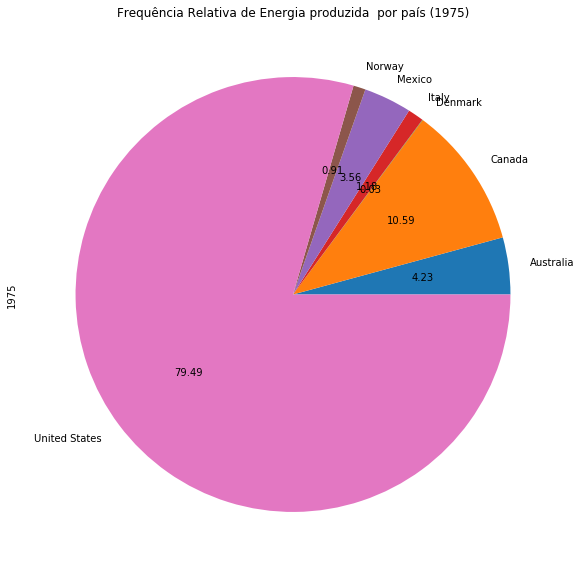

In [305]:
enerprod_1975['1975'].plot.pie(autopct="%.2f", figsize = (10,10));
plt.title("Frequência Relativa de Energia produzida  por país (1975)")

In [306]:
#eneruse = energy_use_idx.loc[lista_membros1, lista_ano]
#eneruse

Vamos repetir o processo para a produção total de óleo por ano de cada país.

In [307]:
oilprod = oil_production_idx.loc[lista_membros1, [1975, 1976, 1977, 1978, 1979, 1980]]
oilprod_1975 = oilprod.loc[:, [1975]]
soma_total = oilprod_1975[1975].sum()
oilprod_1975[1975] = oilprod_1975[1975]/soma_total*100
oilprod_1975


,1975
"Crude oil production, total (toe)",
Australia,3.466485
Canada,13.078502
Denmark,0.023438
Italy,0.197999
Mexico,6.437733
Norway,1.478597
United States,75.317245


Text(0.5, 1.0, 'Frequência Relativa de Óleo produzido por país (1975)')

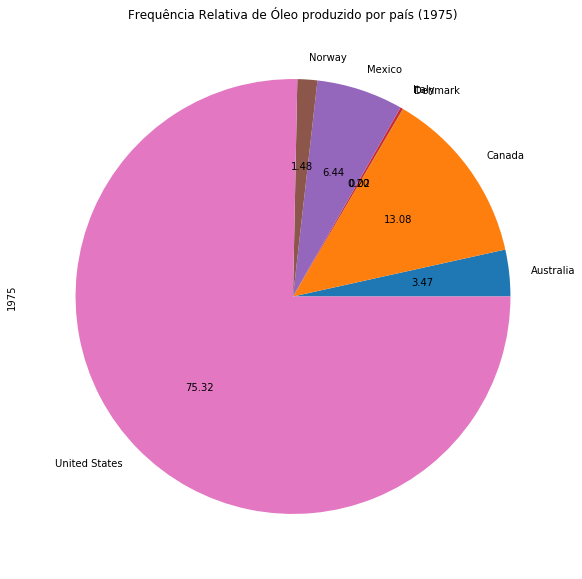

In [308]:
oilprod_1975[1975].plot.pie(autopct="%.2f", figsize = (10, 10));
plt.title('Frequência Relativa de Óleo produzido por país (1975)')


Após analisar os dados acima, percebe-se que os valores das frequências relativas do total de energia produzida se assemelha muito àqueles do total de óleo produzido, indicando que essas variáveis tem uma correlação. Para confirmar essa hipótese, vamos fazer um gráfico de dispersão:

In [309]:
#oilreser = oil_proved_reserves_idx.loc[lista_membros1, [1980, 1981, 1982, 1983, 1984, 1985]]
#oilreser

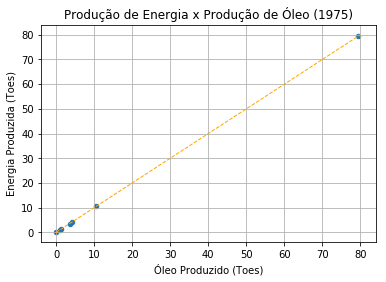

In [310]:
dados = oilprod_1975.join(enerprod_1975, how='inner', lsuffix ='_oil', rsuffix ='_energy')

plot = dados.plot.scatter(x="1975", y="1975")

def func (x):
    y=x
    return y

solucao=[]
lista_tempo = np.arange(0, 80, 1e-3)
for i  in lista_tempo:
    solucao.append(func(i))

plt.plot(lista_tempo,solucao,  color = 'orange', linestyle="dashed", linewidth=1)
plt.title("Produção de Energia x Produção de Óleo (1975)")
plt.xlabel("Óleo Produzido (Toes)")
plt.ylabel("Energia Produzida (Toes)")
plt.grid()
plt.show(True)




Ao traçarmos uma reta com inclinação de 45 graus (NÃO é a linha de tendência), podemos visualizar que o quanto mais próximo os pontos estiverem da reta, maior a influência a produção total de óleo anualmente exerce sobre o total de energia produzido. A hipótese citada previamente foi confirmada para todos os países da amostra.

Após confirmar que energia total e produção de óleo estavam altamente correlacionados à época, agora iremos analisar como essas duas
variáveis se comportaram nos anos subsequentes, primeiro em um período de 5 anos e logo em seguida em um período de 25 anos.

Text(0.5, 0, 'País')

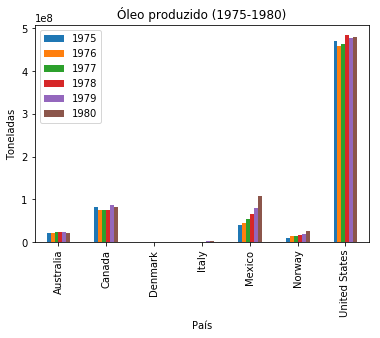

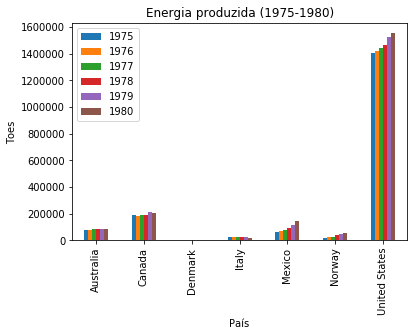

In [311]:
oilprod.plot(kind='bar')
plt.title("Óleo produzido (1975-1980)")
plt.ylabel("Toneladas")
plt.xlabel("País")

enerprod.plot(kind='bar')
plt.title("Energia produzida (1975-1980)")
plt.ylabel("Toes")
plt.xlabel("País")

Text(0, 0.5, 'Toes')

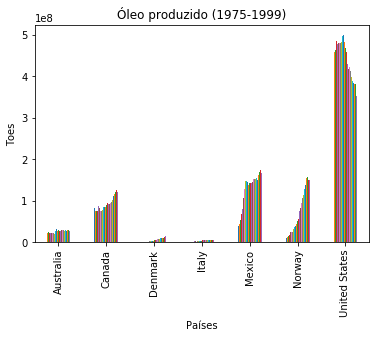

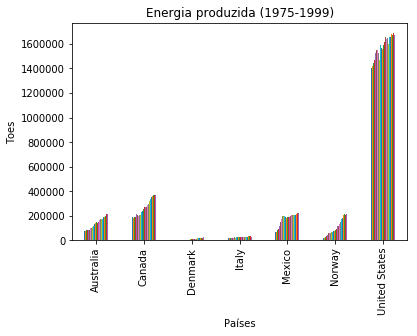

In [312]:
lista_anos1 = []
lista_anos2 = []
k=1974
for i in range (0, 25):
    k+=1
    lista_anos1.append(k)
    lista_anos2.append(k)
    lista_anos2[i] = str(lista_anos2[i])

enerprod_19 = energy_produce_idx.loc[lista_membros1, lista_anos2]
oilprod_19 = oil_production_idx.loc[lista_membros1, lista_anos1]

oilprod_19.plot(kind='bar', legend = False)
plt.title("Óleo produzido (1975-1999)")
plt.xlabel("Países")
plt.ylabel("Toes")

enerprod_19.plot(kind='bar', legend = False)
plt.title("Energia produzida (1975-1999)")
plt.xlabel("Países")
plt.ylabel("Toes")



Como os valores produzidos pela Dinamarca e Itália são muito pequenos, vamos criar um novo gráfico de barras em que podemos ter uma visualização melhor dos dados.

Text(0.5, 0, 'Países')

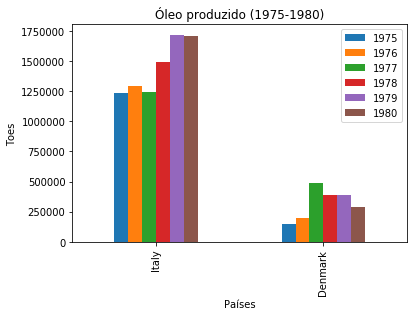

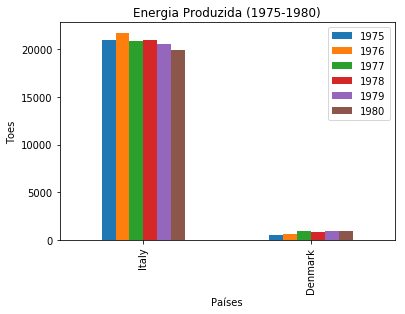

In [313]:
oilprod_italy_denmark = oilprod.loc[['Italy', 'Denmark'], :]
oilprod_italy_denmark.plot(kind='bar')
plt.title("Óleo produzido (1975-1980)")
plt.xlabel("Países")
plt.ylabel("Toes")

enerprod_italy_denmark = enerprod.loc[['Italy', 'Denmark'], :]
enerprod_italy_denmark.plot(kind="bar")
plt.title("Energia Produzida (1975-1980)")
plt.ylabel("Toes")
plt.xlabel("Países")

Text(0.5, 0, 'Países')

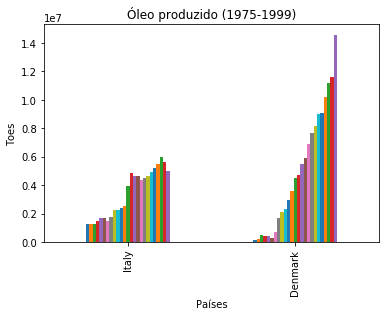

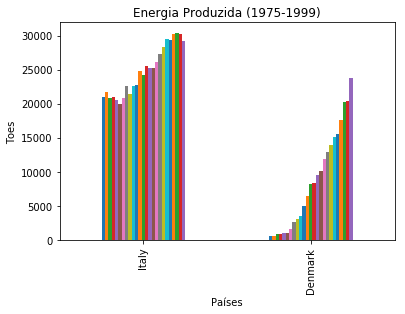

In [314]:
oilprod_italy_denmark = oil_production_idx.loc[['Italy', 'Denmark'], lista_anos1]
oilprod_italy_denmark.plot(kind='bar', legend = False)
plt.title("Óleo produzido (1975-1999)")
plt.xlabel("Países")
plt.ylabel("Toes")

enerprod_italy_denmark = energy_produce_idx.loc[['Italy', 'Denmark'], lista_anos2]
enerprod_italy_denmark.plot(kind="bar", legend = False)
plt.title("Energia Produzida (1975-1999)")
plt.ylabel("Toes")
plt.xlabel("Países")

Com a análise feita, podemos concluir que a resposta para a pergunta é que a IEA influenciou a produção de energia de todos os países de forma a aumentá-la ou estabiliza-la. Mesmo que a dimensão dos dados de cada país seja muito diferente, a proporcionalmente, os dados apresentam comportamento  similar. Portanto, é certo dizer que a IEA contribuiu para a produção de óleo a partir de 1974 e trouxe benefícios para a produção energética dos seus países-membros (exceto os EUA, que, talvez por ser um país com muitas matrizes energéticas, o óleo não foi tão vital para a energia total produzida, visto que mesmo com o declínio de sua produção, a energia ainda continuava a aumentar).

Mesmo que já se concluiu e se confirmou a hipótese, vamos analisar mais a fundo como ela evolui ao longo dos anos. Para isso, vamos explorar o período que escolhemos de 1975 até 1999. Logo, primeiramente vamos descobrir qual é a taxa de crescimento da produção de óleo a cada ano em cada paíse construir um gráfico temporal.

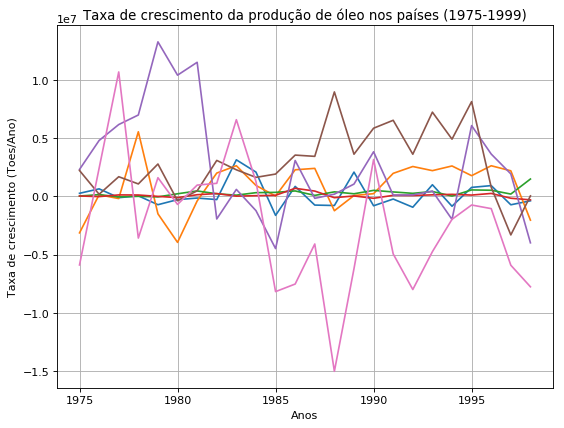

In [316]:
media_cresc = []
for i in range(75,99):
    media_cresc.append((oilprod_19[int('19{}'.format(i + 1))] - oilprod_19[int('19{}'.format(i))])/2)
lista_tempo = np.arange(1975, 1999, 1)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(lista_tempo, media_cresc)
plt.title('Taxa de crescimento da produção de óleo nos países (1975-1999)')
plt.xlabel('Anos')
plt.ylabel('Taxa de crescimento (Toes/Ano)')
plt.grid(True)
plt.show()

Não é possível obter uma conclusão do gráfico acima, pois a visualização está muito confusa. Por isso, vamos construir outro gráfico de retas que partem da origem e que têm coeficiente angular igual ao valor da média de crescimento entre anos 1975 e 1999. Ou seja, diferentemente do gráfico anterior, em que a taxa foi calculada a cada ano, dessa vez utilizaremos apenas os pontos dos anos 1975 e 1999 para calcular a média. 

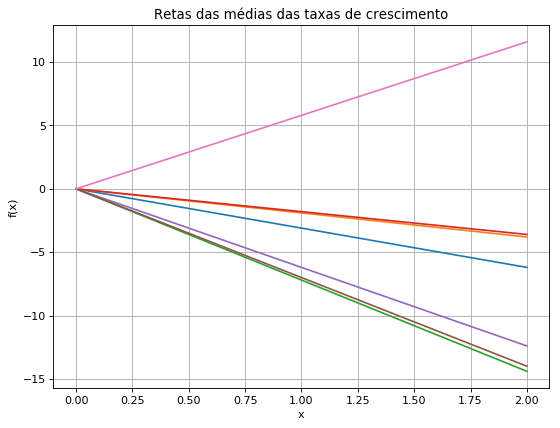

In [317]:

media_cresc_total['media']= ((oilprod_19[int('1975')] - oilprod_19[int('1999')])/2)
media_cresc_total_def = media_cresc_total.loc[:, ['media']] 
media_cresc_total_def

def functions (x):
    y1=-3.1*x
    y2=-1.9*x
    y3=-7.2*x
    y4=-1.8*x
    y5=-6.2*x
    y6=-7*x
    y7=5.8*x
    return [y1, y2, y3, y4, y5, y6, y7]

solucao1=[]
solucao2=[]
solucao3=[]
solucao4=[]
solucao5=[]
solucao6=[]
solucao7=[]

for i in range(0, 3):
    solucao1.append(functions(i)[0])
    solucao2.append(functions(i)[1])
    solucao3.append(functions(i)[2])
    solucao4.append(functions(i)[3])
    solucao5.append(functions(i)[4])
    solucao6.append(functions(i)[5])
    solucao7.append(functions(i)[6])
    
lista_cresc_total = np.arange(0, 3, 1)



figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(lista_cresc_total, solucao1)
plt.plot(lista_cresc_total, solucao2)
plt.plot(lista_cresc_total, solucao3)
plt.plot(lista_cresc_total, solucao4)
plt.plot(lista_cresc_total, solucao5)
plt.plot(lista_cresc_total, solucao6)
plt.plot(lista_cresc_total, solucao7)
plt.title("Retas das médias das taxas de crescimento")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.grid(True)
plt.show()

A partir do gráfico acima, podemos afirmar que mesmo que durante a fundação do IEA a produção de óleo e energia tenham aumentado significativamente nos países-membros, durante um período mais longo o comportamento observado não é o mesmo. Assim, a maioria das retas possuem coeficiente angular negativo, indicando que a média de crescimento da produção diminuiu! (note novamente que os Estados Unidos têm um comportamento de variável aberrante a longo prazo, pois ele é representado pela linha rosa no gráfico, que é a única com coeficiente angular positivo).

Por último, vamos comparar um país-membro da IEA (México) e outros não-participantes (restante) que possuíam características socioeconômicas
um pouco similares à época e eram do mesmo continente.

Text(0.5, 0, 'Países')

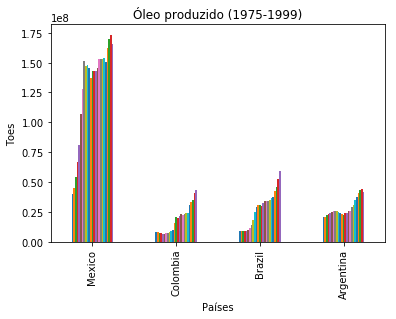

In [318]:
lista_anos3 = []
lista_anos4 = []
k=1974
for i in range (0, 25):
    k+=1
    lista_anos3.append(k)
    lista_anos4.append(k)
    lista_anos4[i] = str(lista_anos4[i])
    
oilprod_15_mex_arg = oil_production_idx.loc[['Mexico', 'Colombia', 'Brazil', 'Argentina'], lista_anos3]
oilprod_15_mex_arg.plot(kind='bar', legend = False)
plt.title ("Óleo produzido (1975-1999)")
plt.ylabel("Toes")
plt.xlabel("Países")

Fica claramente perceptível que os países não-participantes não crescerem muito na produção de óleo durante o período
que sucedeu a fundação do IEA (1974-1980) e que o crescimento do Mexico durante esse período foi muito mais acentuado. O crescimento
dos outros países nessa área ocorreu alguns anos mais tarde, provavlemente devido a outros fatores econômicos, confirmando que
o IEA influenciou seus países-membros.

Referências: https://www.iea.org/ - https://pt.wikipedia.org/wiki/Ag%C3%AAncia_Internacional_de_Energia - https://en.wikipedia.org/wiki/1973_oil_crisis https://www.vox.com/2015/10/12/9510879/iea-underestimate-renewables https://www.sciencedirect.com/science/article/pii/S0140988302000610
             